**1. Realice la búsqueda de un conjunto de datos de mínimo 1000 registros, donde pueda obtener información correspondiente al sector asignado y al cual se le pueda aplicar el método de RBNN. Adjunte enlace de acceso al dataset (enlace de la página de donde obtuvo los datos)**

Para el ejercicio usé un dataset con 5110 filas pero para practicidad decidí tomar 1200 filas para realizar el ejercicio.
Fuente: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Pero algo importante es que el conjunto de datos original, se basa en el Electronic Health Record (EHR) controlado por McKinsey & Company; el conjunto de datos original se utilizó como conjunto de datos como parte de su hackatón de atención médica.
Fuente:
https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon/#DiscussTab.

Fuente: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9264165

**Importante**: Aún así, las fuentes del EMR son confidenciales.

**2. Realice la lectura del banco de datos e imprima las categorías que tiene y cuales son las variables dependientes e independientes.**

In [1]:
import pandas as pd
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv", sep=",")

data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
data = data.iloc[:1200]

data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,38649,Female,23.0,0,0,No,Private,Rural,79.33,41.5,never smoked,0
1196,53266,Female,33.0,0,0,Yes,Private,Urban,79.91,33.5,never smoked,0
1197,26031,Female,14.0,0,0,No,Private,Rural,84.46,21.8,Unknown,0
1198,1191,Female,79.0,0,1,Yes,Private,Urban,68.40,22.1,formerly smoked,0


In [3]:
#categorías
columns_names = data.columns.values
print(columns_names)

['id' 'gender' 'age' 'hypertension' 'heart_disease' 'ever_married'
 'work_type' 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status'
 'stroke']


In [4]:
#variable independeinte
X = data.iloc[:, :-1].values
print(X)

[[9046 'Male' 67.0 ... 228.69 36.6 'formerly smoked']
 [51676 'Female' 61.0 ... 202.21 nan 'never smoked']
 [31112 'Male' 80.0 ... 105.92 32.5 'never smoked']
 ...
 [26031 'Female' 14.0 ... 84.46 21.8 'Unknown']
 [1191 'Female' 79.0 ... 68.4 22.1 'formerly smoked']
 [36820 'Male' 64.0 ... 78.43 30.2 'smokes']]


In [5]:
#variable dependiente
Y = data.iloc[:, -1].values
print(Y)

[1 1 1 ... 0 0 0]


**3. Realice el proceso de limpieza de los datos, justficando cada una de las etapas utilizadas.**

In [6]:
#La columna id no es relevante para el analisis por lo tanto la elimino
data.drop(columns=['id'],inplace=True)
data

<ipython-input-6-5c1ce8e0b200>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['id'],inplace=True)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
1195,Female,23.0,0,0,No,Private,Rural,79.33,41.5,never smoked,0
1196,Female,33.0,0,0,Yes,Private,Urban,79.91,33.5,never smoked,0
1197,Female,14.0,0,0,No,Private,Rural,84.46,21.8,Unknown,0
1198,Female,79.0,0,1,Yes,Private,Urban,68.40,22.1,formerly smoked,0


In [7]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
1195,Female,23.0,0,0,No,Private,Rural,79.33,41.5,never smoked,0
1196,Female,33.0,0,0,Yes,Private,Urban,79.91,33.5,never smoked,0
1197,Female,14.0,0,0,No,Private,Rural,84.46,21.8,Unknown,0
1198,Female,79.0,0,1,Yes,Private,Urban,68.40,22.1,formerly smoked,0


In [8]:
print(data.isnull().sum())

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  63
smoking_status        0
stroke                0
dtype: int64


In [9]:
#para este caso usare imputacion con la media

In [10]:
from scipy import stats
import statistics

In [11]:
promedio_bmi = data['bmi'].mean()
data['bmi'].fillna(promedio_bmi, inplace=True)

<ipython-input-11-228115c46e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bmi'].fillna(promedio_bmi, inplace=True)


In [12]:
print(data.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


**4. Para el caso de datos nulos o no válidos, realice el análisis de cuál es el mejor procedimiento para realizar el tratamiento de esos datos y justifique cada uno de los procedimientos utilizados.**

-En el inicio se borró la columna de id ya que no es relevante para el procedimiento

-Para el caso con la base de datos con la que trabajé podemos observar que en el proceso de limpieza de datos
en la columna de bmi los valores nulos representan solamente un 5% del total de las filas con las que se trabajan
pero no es correcto para este caso eliminarlos, por lo tanto se hace mejor una imputación para llenos esos valores nulos
usando la imputación con la media, ya que al eliminarlos se perdería información importante para el análisis

-promedio_bmi = data['bmi'].mean()
data['bmi'].fillna(promedio_bmi, inplace=True)

Como podemos observar en esta parte del codigo utilizada en el punto anterior de limpieza de datos, tenemos que primero en la variable promedio_bmi se guarda el valor promedio de la columna bmi con .mean() y posteriormente con fillna se reemplazan esos valores nulos por la media de la misma columna bmi anteriormente calculada.


**5. Realice un análisis de correlación y determine cuales de las variables del conjunto de datos tiene correlación con la variable objetvo, justifique su respuesta.**

In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-14-fbb57530e5d9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=abs(data.corr())


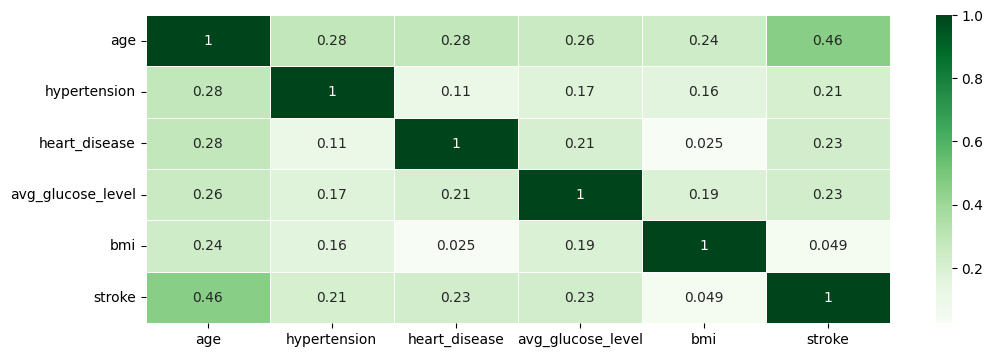

In [14]:
# check correlation
# Calculate correlation matrix and visualize as heatmap
plt.figure(figsize=(12,4))
corr=abs(data.corr())
sns.heatmap(corr, linewidth=0.5, annot=True, cmap="Greens")

plt.show()


In [15]:
data[['stroke','age']].corr()

,stroke,age
stroke,1.000000,0.455834
age,0.455834,1.000000


In [16]:
data[['stroke','heart_disease']].corr()

,stroke,heart_disease
stroke,1.000000,0.226561
heart_disease,0.226561,1.000000


In [17]:
data[['stroke','avg_glucose_level']].corr()

,stroke,avg_glucose_level
stroke,1.000000,0.228982
avg_glucose_level,0.228982,1.000000


-Podemos observar que ninguna variable tiene una correlación perfecta con la variable objetivo que es 'stroke'

-tampoco hay variables de correlación nula

-en el caso de la variable 'age' si se puede observar una asociación moderada con 0.45

-con las variables de avg_glucose_level y heart_disease tienen una correlacion de 0.23, 'hypertension' tiene un valor de correlación de 0.21. Esto indica que las tres tienen una asociación mediana y es relevante para el análisis

-Estos resultados indican que las variables señaladas tienen dependencia respecto a la variable de 'stroke' ya que superan el valor de 0 que indica asociación nula

**6. Divida el conjunto de datos así, 80% entrenamiento y 20% pruebas.**

In [18]:
y = data['stroke']

In [19]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1195    0
1196    0
1197    0
1198    0
1199    0
Name: stroke, Length: 1200, dtype: int64

In [20]:
X = data.drop(columns = 'stroke')
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.587511,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...
1195,Female,23.0,0,0,No,Private,Rural,79.33,41.500000,never smoked
1196,Female,33.0,0,0,Yes,Private,Urban,79.91,33.500000,never smoked
1197,Female,14.0,0,0,No,Private,Rural,84.46,21.800000,Unknown
1198,Female,79.0,0,1,Yes,Private,Urban,68.40,22.100000,formerly smoked


In [21]:
#y = data['stroke']

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

Para practicidad se va a ejecutar la división de los datos de entrenamientoy prueba despues de transformar los atributos categoricos a numericos, para evitar ejectutar dos veces el mismo codigo pero la linea es la sigiente marcada en comentario:

In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

**7. En caso de ser necesario transforme los atributos categóricos a numéricos. Explique la elección del método utilizado para su conjunto de datos.**

In [24]:
print(data.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [25]:
#primero pasar de objecto a categoricos

In [26]:
objeto_a_category = data.select_dtypes(["object"]).columns
data[objeto_a_category] = data[objeto_a_category].astype('category')

objeto_a_category = X.select_dtypes(["object"]).columns
X[objeto_a_category] = X[objeto_a_category].astype('category')

<ipython-input-26-55f3c5f00064>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[objeto_a_category] = data[objeto_a_category].astype('category')


In [27]:
#convertir, metodo replace para cosas isi y labelencoder para mas de 2

In [28]:
data['gender'].value_counts()

Female    718
Male      482
Name: gender, dtype: int64

In [29]:
data['gender'].replace(['Female', 'Male'],
                        [0, 1], inplace=True)
X['gender'].replace(['Female', 'Male'],
                        [0, 1], inplace=True)

<ipython-input-29-0cbdbf8a6e6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'].replace(['Female', 'Male'],


In [30]:
data['ever_married'].value_counts()

Yes    841
No     359
Name: ever_married, dtype: int64

In [31]:
data['ever_married'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)
X['ever_married'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)

<ipython-input-31-d025f584db54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ever_married'].replace(['Yes', 'No'],


In [32]:
data['Residence_type'].value_counts()

Urban    604
Rural    596
Name: Residence_type, dtype: int64

In [33]:
data['Residence_type'].replace(['Urban', 'Rural'],
                        [0, 1], inplace=True)
X['Residence_type'].replace(['Urban', 'Rural'],
                        [0, 1], inplace=True)

<ipython-input-33-b04588cd6f52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Residence_type'].replace(['Urban', 'Rural'],


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder = LabelEncoder()

In [36]:
print(label_encoder)

LabelEncoder()


In [37]:
data['work_type'].value_counts()

Private          724
Self-employed    204
Govt_job         146
children         121
Never_worked       5
Name: work_type, dtype: int64

In [38]:
data['work_type'] = label_encoder.fit_transform(data['work_type'])
X['work_type'] = label_encoder.fit_transform(X['work_type'])

<ipython-input-38-8550ce6144b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['work_type'] = label_encoder.fit_transform(data['work_type'])


In [39]:
data['smoking_status'].value_counts()

never smoked       470
Unknown            323
formerly smoked    221
smokes             186
Name: smoking_status, dtype: int64

In [40]:
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])
X['smoking_status'] = label_encoder.fit_transform(X['smoking_status'])

<ipython-input-40-fe68754317a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])


En esta linea siguiente como expliqué anteriormente aplico el split de los datos en entrenamiento y prueba ya una vez convertidos los valores categoricos a numericos.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Para este en el caso de situaciones binarias uso el replace basico ya que son clasificaciones sencillas y para los otros el label donde de manera en el orden que aparecen las clasificaciones en el dataset elige los numeros clasificandolos desde 0

**8. Para el conjunto de datos de entrenamiento realice el escalado del conjunto (normalización o estandarización) realice la justificación del método seleccionado para su conjunto de datos.**

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


Como se puede observar en el dataframe de data, hay un parde columnas que tienen escalas diferentes al resto por el tipo de característica que representan y no se puede representar en un modo binario. Si dejo estos valores en una escala diferete, esto puede sesgar las predicciones que se van a realizar en los siguiente puntos o en general trabajandolo en la parte de clasificación y tasas de precisión.

En el caso del ejercicio StandarScaler sirve para estandarizar los datos en un formato estandar, y algo importante de este método es que solo funciona con valores que siguen un distribución normal, por lo tanto es pertinente para este ejercicio.

**9. Realice la implementación de la RBNN en su conjunto de datos, Defina la taza de aprendizaje y el error en 0.01 y 1e-7 respectivamente, justifique la técnica utilizada para definir el número de centroides**

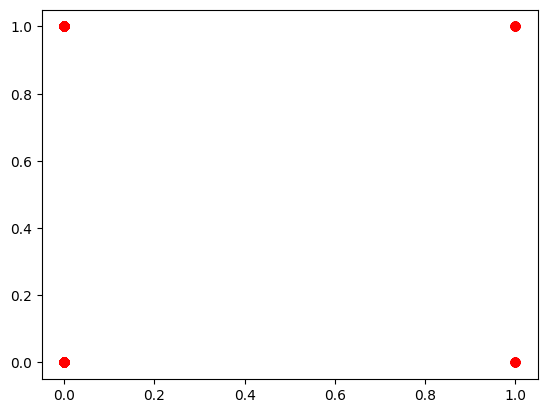

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import statistics as stat

def generate_data_points(num_data_points):
  y_list = data['stroke']
  desired_y_list = data['stroke']
  x_list = data['heart_disease']
  """
  for i in range(num_data_points):
    x = np.random.uniform(0.0, 1.0)
    x_list.append(x)
    y = 0.5 + 0.4 * math.sin(3 * math.pi * x)
    noise = np.random.uniform(-0.1, 0.1)
    y_noise = y + noise
    y_list.append(y_noise)
    desired_y_list.append(y)"""
  return x_list, y_list, desired_y_list

x_list, y_list, desired_y_list = generate_data_points(75)
data = np.array([x_list, y_list])

#print(data)
#print(data[0][0])

clusters_x = np.random.choice(np.squeeze(data[0]), size=1)
clusters_y = np.random.choice(np.squeeze(data[1]), size=1)
clusters = np.array([clusters_x, clusters_y])

plt.plot(x_list, y_list, 'ro')

In [44]:
'''
implementation of k-means
'''
def kmeans(data, num_clusters):
  # randomly generate num_clusters clusters from the data point
  clusters_x = np.random.choice(np.squeeze(data[0]), size=num_clusters)
  clusters_y = np.random.choice(np.squeeze(data[1]), size=num_clusters)
  clusters = np.array([clusters_x, clusters_y])
  prev_clusters = clusters.copy()
  variance = np.zeros(num_clusters) # initialize all variance to zero
  converged = False
  all_same_variance = 0

  dp, num_clusters = (len(data[0]), num_clusters) # distance is a 2d array, x axis is the data point, y axis is the cluster
  # distance[i][j][0] means the squared distance from the ith data point to jth cluster
  # distance[i][j][1] means the x axis of that the i data point
  # distance[i][j][2] means the y axis of that the i data point
  distance = np.array([[[0.0, 0.0, 0.0] for i in range(dp)] for j in range(num_clusters)])

  while not converged:
    # compute the distance from each data point to each clusters and store it in a 2darray
    for i in range(num_clusters): # for all the clusters
      cluster = [clusters[0][i], clusters[1][i]] # get one cluster
      for j in range(len(data[0])): # for all the data point
        dp = [data[0][j], data[1][j]] # get one dp
        squared_distance = (cluster[0] - dp[0])**2 + (cluster[1] - dp[1])**2
        all_same_variance += squared_distance
        distance[i][j][0] = squared_distance
        distance[i][j][1] = dp[0] # x coordinate
        distance[i][j][2] = dp[1] # y coordinate

    distanceT = distance.transpose(1,0,2)
    current_cluster_index = 0
    smallest_data_point_x = 0
    smallest_data_point_y = 0
    smallestDistance = 1000 # set to a big number
    clusters.fill(0)
    num_dp_belongs_to_each_cluster = [1 for i in range(num_clusters)]
    cluster_dp_x = [[] for i in range(num_clusters)] # holds x axis of all datapoints belong to cluster i
    cluster_dp_y = [[] for i in range(num_clusters)] # holds y axis of all datapoints belong to cluster i

    for i in range(len(distanceT)): # number of data point
      for j in range(len(distanceT[i])): # for each distance from the cluster to the i data point
        dis = distanceT[i][j][0] # the squared distance at data point i at cluster j
        if dis < smallestDistance:
          smallestDistance = dis
          smallest_data_point_x = distanceT[i][j][1]
          smallest_data_point_y = distanceT[i][j][2]
          current_cluster_index = j
      smallestDistance = 1000
      num_dp_belongs_to_each_cluster[current_cluster_index] += 1
      clusters[0][current_cluster_index] += smallest_data_point_x
      cluster_dp_x[current_cluster_index].append(smallest_data_point_x)
      clusters[1][current_cluster_index] += smallest_data_point_y
      cluster_dp_y[current_cluster_index].append(smallest_data_point_y)

    # calculate the means
    for i in range(num_clusters):
      clusters[0][i] = clusters[0][i] / num_dp_belongs_to_each_cluster[i]
      clusters[1][i] = clusters[1][i] / num_dp_belongs_to_each_cluster[i]

    # if the difference between the current cluster and previous cluster is small, the it converged.
    converged = np.linalg.norm(clusters - prev_clusters) < 1e-6
    prev_clusters = clusters.copy()

  clusters = clusters.transpose()
  clustersWithNoPoints = []
  for i in range(num_clusters):
    dp_for_cluster = num_dp_belongs_to_each_cluster[i]
    if dp_for_cluster < 2:
      # keep track of clusters with no points or 1 point
      clustersWithNoPoints.append(i)
      continue
    else:
      distance_dp_to_cluster = []
      for j in range(len(cluster_dp_x[i])):
        cluster_x = clusters[i][0]
        clsuter_y = clusters[i][1]
        dp_x = cluster_dp_x[i][j]
        dp_y = cluster_dp_y[i][j]
        delta_x_square = (cluster_x - dp_x)**2
        delta_y_square = (clsuter_y - dp_y)**2
        distance_dp_to_cluster.append(math.sqrt(delta_x_square + delta_y_square))
      if len(distance_dp_to_cluster) < 2:
        variance[i] = 0
      else:
        variance[i] = stat.variance(distance_dp_to_cluster) # assign x variance of the i cluster to the ith idnex

  # if there are clusters with 0 or 1 points, take the mean variance of the other clusters
  if len(clustersWithNoPoints) > 0:
    avg_variance_all_other_clusters = []

    for i in range(num_clusters):
      if i not in clustersWithNoPoints:
        avg_variance_all_other_clusters.append(variance[i])
    variance[clustersWithNoPoints] = np.mean(avg_variance_all_other_clusters)

  all_same_variance = all_same_variance/num_clusters
  all_same_variance = np.array([all_same_variance for i in range(len(variance))])

  return clusters, variance

# test result
clusters, variance = kmeans(data, num_clusters=3)
print('Final clusters: ', clusters)
print('Final variance: ', variance)

Final clusters:  [[0 0]
 [0 0]
 [0 0]]
Final variance:  [0.21450482 0.21450482 0.21450482]


Predication accuracy of points:  0.0
Average error of all points:  0.14148652886297472


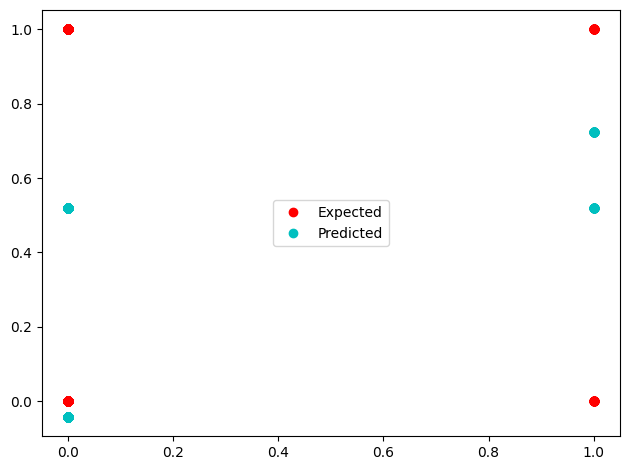

In [45]:
'''
Implementation of the RBF network including regression
'''

def rbf(x, centers, variance):
    return np.exp(-np.linalg.norm(centers - x)**2)

class RBFNet(object):
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k=3, lr=0.01, epochs=100, rbf=rbf):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def fit(self, X, y):
      # compute variance from data
      self.centers, self.variance = kmeans(X, self.k)


      # training
      X = X.transpose()
      for epoch in range(self.epochs):
        for i in range(X.shape[0]):
            # forward pass
            a = np.array([self.rbf(X[i], center, variance) for center, variance, in zip(self.centers, self.variance)])
            F = a.T.dot(self.w) + self.b
            loss = (y[i] - F).flatten() ** 2

            # backward pass
            error = -(y[i] - F).flatten()

            # online update
            #self.w = self.w - self.lr * a.dot(error)
            self.w = self.w - self.lr * a * error
            self.b = self.b - self.lr * error

    def predict(self, X):
      y_pred = []
      X = X.transpose()
      for i in range(len(X)):
        a = np.array([rbf(X[i], center, variance) for center, variance, in zip(self.centers, self.variance)])
        F = a.T.dot(self.w) + self.b
        y_pred.append(F)
      return y_pred


# create the RNF network
rbfnet = RBFNet(lr=0.01, k=8)
# training process
rbfnet.fit(data, desired_y_list)
# make prediction using the network
y_pred = rbfnet.predict(data)

# plot the result
plt.plot(data[0], y_list, 'ro', label='Expected')
plt.plot(data[0], y_pred, 'co', label='Predicted')

# calculating the accuracy and average error
num_correct_prediction_points = 0
for i in range(len(y_list)):
  if abs(y_pred[i] - y_list[i]) < 1e-7:
    num_correct_prediction_points += 1
print('Predication accuracy of points: ', num_correct_prediction_points/len(y_list))

avgError = np.mean([abs(y_pred[i] - y_list[i]) for i in range(len(y_list))])
print('Average error of all points: ', avgError)

plt.legend()
plt.tight_layout()
plt.show()

Para la aplicación de RBF utilicé el método kmeans para encontrar el numero de centroides ya que lo hace de manera rapida y como se puede observar, de acuerdo al tipo de caracterísitcas de las variables con las que trabajé las agrupa de acuerdo a sus similitudes, lo que es necesario en este caso al trabajar con variables binarias.

**10. Valide utilizando el método de validación cruzada por lo menos 3 topologías de la red e imprima los resultados para cada topología y justifique la elección de la topología implementada.**

In [46]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


X = x_list
y= y_list

kf = KFold(n_splits = 2, shuffle = True, random_state = 2)

for entrenamiento_indice, prueba_indice in kf.split(X):
  print("\nEntrenamiento:", entrenamiento_indice, "\nPrueba: ", prueba_indice)
  X_entrenamiento, X_prueba = X[entrenamiento_indice], X[prueba_indice]
  y_entrenamiento, y_prueba = y[entrenamiento_indice], y[prueba_indice]
  X_entrenamiento = X_entrenamiento.values.reshape([X_entrenamiento.values.shape[0],])
  X_prueba = X_prueba.values.reshape([X_prueba.values.shape[0],1])
  rbfnet.fit(data, desired_y_list)
  y_pred = rbfnet.predict(data)
  print(y_pred)
  print("Error: ", mean_squared_error(y_list, y_pred))




Entrenamiento: [   3    5    6    8    9   11   14   17   19   23   24   25   27   28
   29   31   32   33   34   35   38   39   41   43   44   48   49   50
   51   52   53   54   57   59   63   64   69   73   76   78   79   81
   85   87   88   92   93   94   95   96   97   98  100  103  104  105
  106  110  112  113  114  115  118  121  122  123  124  127  131  132
  133  135  136  138  139  140  144  145  147  149  150  151  153  154
  159  161  162  165  166  167  168  170  173  184  186  187  189  190
  191  195  196  201  203  206  207  210  211  214  215  217  218  220
  221  222  224  225  228  229  233  234  237  238  242  243  244  245
  246  247  249  252  253  254  255  256  259  260  261  262  264  266
  269  274  276  277  278  282  283  289  292  296  297  298  299  300
  301  302  303  306  307  314  320  324  325  329  331  332  334  336
  337  339  341  348  350  352  354  357  358  359  360  362  364  366
  368  369  371  372  373  377  378  380  381  382  383  386 

**11. Realice la validación con su conjunto de datos de pruebas, imprima la matriz de confusión si su ejercicio es de clasificación y explique los resultados. Si su ejercicio es de aproximación de funciones imprima el error cuadrático medio de las predicciones y explique su respuesta.**

In [47]:
y_pred = np.array(y_pred, dtype=np.int32)

In [48]:
from sklearn.metrics import confusion_matrix
#y_pred=y_pred.astype('category')


cm = confusion_matrix(
  y_list,
  y_pred
)



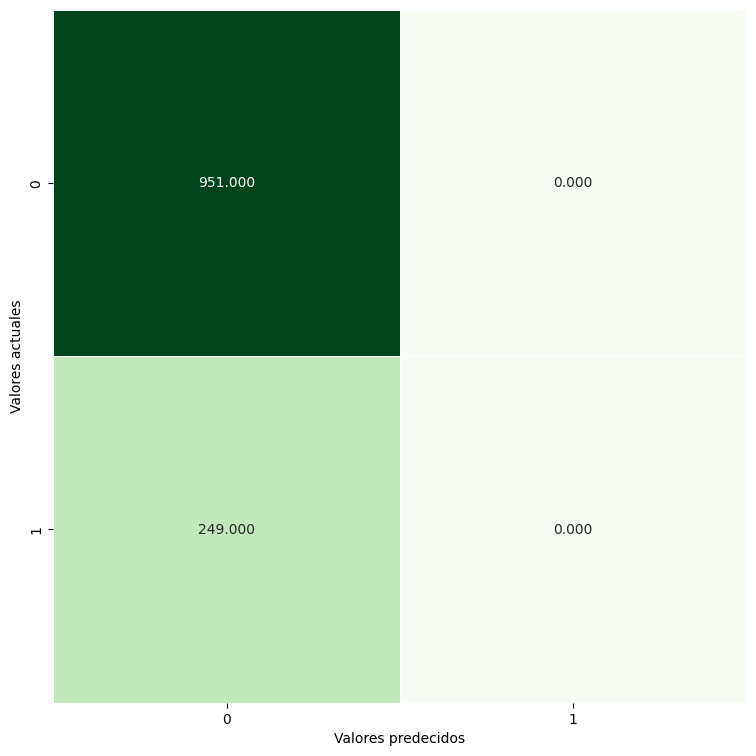

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, cmap="Greens", fmt = '0.3f', linewidth = 0.5,
            square = True , cbar = False)
plt.ylabel('Valores actuales')
plt.xlabel('Valores predecidos')
plt.show()

Como podemos observar en la matriz de confusión, hay:

951 Verdaderos positivos: Esto significa que el valor real es positivo y con el análisis realizado se predijo tambien que era positivo. Representa un 80% de los datos clasificados de esta forma

249 Falsos negativos: Muestra que el  valor real es positivo, y la prueba predijo  que el resultado es negativo. Representando un 20% de los datos clasificados de esta forma.

Para los otros datos de la matriz de confusión no representan ningun valor de acuerdo al análisis.